<a href="https://colab.research.google.com/github/kashifkhan9555/Guided-Assessment/blob/main/solved_Guided_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checklist
*Fill this table appropriately as you progress in your tasks:*


|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Not Completed |
|**Section 3**| **[
Causal Inference ]** |

## 1. Funnel Analysis

In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
# df = pd.read_excel('/content/drive/MyDrive/AssignmentData.xlsx', sheet_name='WorkerFunnel')
funnel = pd.read_excel('/content/drive/MyDrive/datasets/AssignmentData.xlsx', sheet_name='WorkerFunnel')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


## Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.

In [ ]:
# shape

funnel.shape


(1197, 7)

In [ ]:
#find missing values

funnel.isnull().sum()


Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [ ]:
# remove missing value


funnel.dropna(inplace=True)



In [ ]:
#check missing value

print(funnel.isnull().sum())


Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64


In [ ]:
funnel.shape

(1167, 7)

In [ ]:
#check duplicate value

print(funnel.duplicated().sum())


36


## 2. Create a new column called Target Achieved (categorical as "Yes" if Actual Productivity is greater than Targeted Productivity, and "No" otherwise). Then, Complete the below given tasks using the columns : Department, Targeted Productivity, Overtime, Number of Workers, Quarter, and Start and End Dates of the observations in the dataset. And give a summary of the results.

In [ ]:
# Step 1: Create a new column "Target Achieved"
funnel['Target Achieved'] = np.where(funnel['Actual Productivity'] > funnel['Targeted Productivity'], 'Yes', 'No')

# Step 2: Perform tasks using specified columns
# Task 1: Group by Department and calculate average Targeted Productivity
avg_targeted_productivity = funnel.groupby('Department')['Targeted Productivity'].mean()

# Task 2: Group by Quarter and calculate total Overtime
total_overtime = funnel.groupby('Quarter')['Overtime'].sum()

# Task 3: Calculate total Number of Workers
total_workers = funnel['No. of Workers'].sum()

# Task 4: Calculate total duration of observations
funnel['Date'] = pd.to_datetime(funnel['Date'], format='%m/%d/%Y')
total_duration = (funnel['Date'].max() - funnel['Date'].min()).days

# Step 3: Provide a summary of the results
print("Summary of Results:")
print("Average Targeted Productivity by Department:\n", avg_targeted_productivity)
print("Total Overtime by Quarter:\n", total_overtime)
print("Total Number of Workers:", total_workers)
print("Total Duration of Observations (days):", total_duration)


Summary of Results:
Average Targeted Productivity by Department:
 Department
Finishing    0.737298
Sewing       0.724247
Name: Targeted Productivity, dtype: float64
Total Overtime by Quarter:
 Quarter
Q1    1575690
Q2    1429560
Q3     987120
Q4    1157570
Q5     163680
Name: Overtime, dtype: int64
Total Number of Workers: 40240.5
Total Duration of Observations (days): 335


In [ ]:
funnel.head(15)

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
3,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
6,2015-01-01,Q1,Finishing,0.75,960,8.0,0.755167,Yes
7,2015-01-01,Q1,Sewing,0.75,6900,57.5,0.753683,Yes
8,2015-01-01,Q1,Sewing,0.75,6000,55.0,0.753098,Yes
9,2015-01-01,Q1,Sewing,0.75,6900,57.5,0.750428,Yes
10,2015-01-01,Q1,Sewing,0.70,6900,57.5,0.721127,Yes


## a) Create grouped bar graphs to show the level of Target achieved( 'yes' and 'No') for the given date range, at a quarterly time interval for both categories. The graph should have appropriate labels, titles and other factors which would make it readable.Also provide a brief interpretation of the graph.

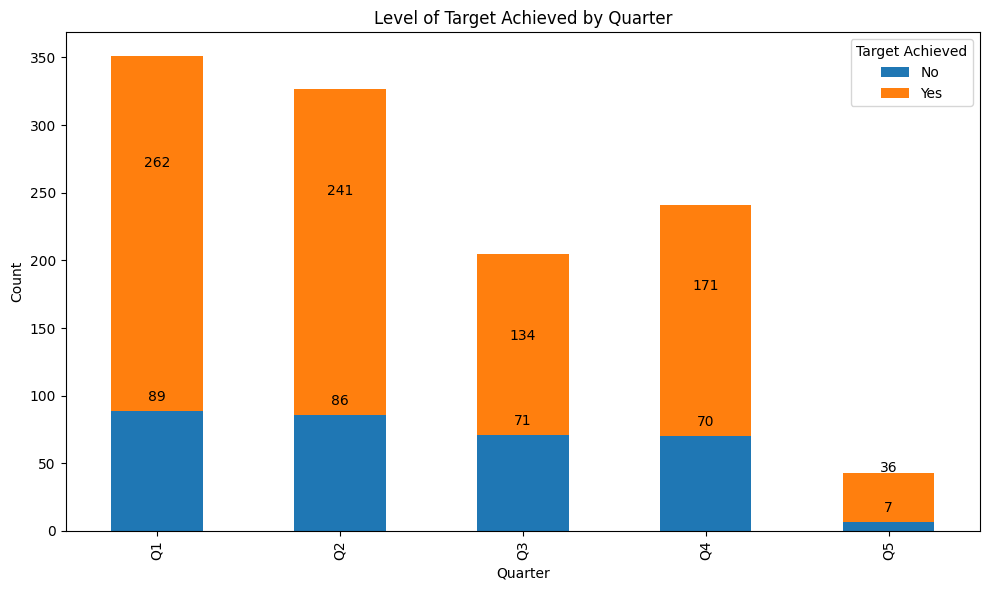

In [ ]:

# Step 1: Filter the DataFrame to include only the desired date range
start_date = '2015-01-01'  # Specify start date of the date range
end_date = '2015-12-31'    # Specify end date of the date range
filtered_df = funnel[(funnel['Date'] >= start_date) & (funnel['Date'] <= end_date)]

# Step 2: Group the data by quarter and Target Achieved categories
grouped_data = filtered_df.groupby(['Quarter', 'Target Achieved']).size().unstack()

# Step 3: Plot the grouped bar graph
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Step 4: Add labels, titles, and other factors
ax.set_title('Level of Target Achieved by Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Count')
ax.legend(title='Target Achieved')

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()




*   The grouped bar graph shows the level of Target achieved ('Yes' and 'No') for each quarter within the specified date range.

*   Each quarter is represented by a pair of bars, where one bar represents the count of 'Yes' and the other bar represents the count of 'No' for Target Achieved.
*  By comparing the heights of the bars within each quarter, we can observe the proportion of instances where the Target was achieved ('Yes') versus where it was not achieved ('No').



## b) Forecast the Actual Productivity and create a line graph for the next four quarters using the following algorithms mentioned below and display the values, then create plots for the result achieved using appropriate plots:
## (i) ARIMA
## (ii) Rolling Averages


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

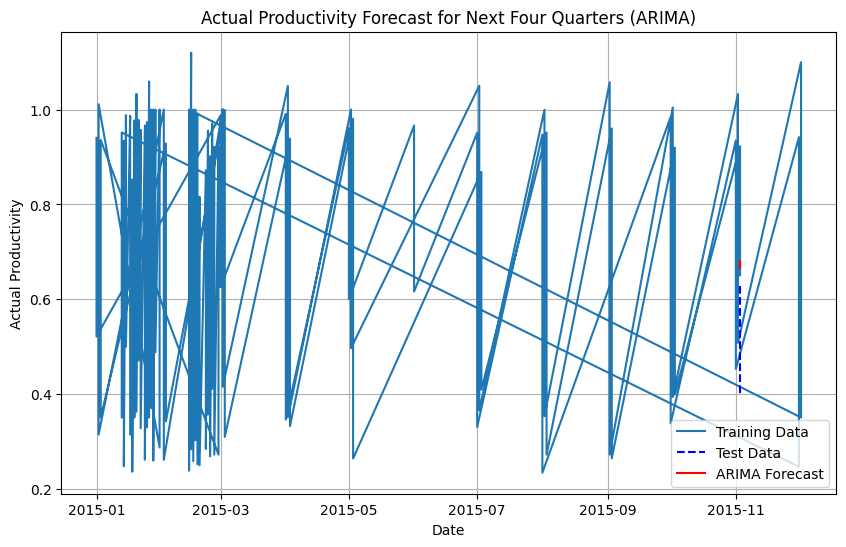

In [ ]:
# Step 1: Preprocess the data
funnel['Date'] = pd.to_datetime(funnel['Date'], format='%m/%d/%Y')
funnel.set_index('Date', inplace=True)

# Step 2: Split the data into training and testing sets
train_data = funnel['Actual Productivity'].iloc[:-4]
test_data = funnel['Actual Productivity'].iloc[-4:]

# Step 3: Train the ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))  # Example order, you may need to tune this
arima_model_fit = arima_model.fit()

# Step 4: Forecast using ARIMA
arima_forecast = arima_model_fit.forecast(steps=4)

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue', linestyle='--')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')

plt.title('Actual Productivity Forecast for Next Four Quarters (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.grid(True)
plt.show()


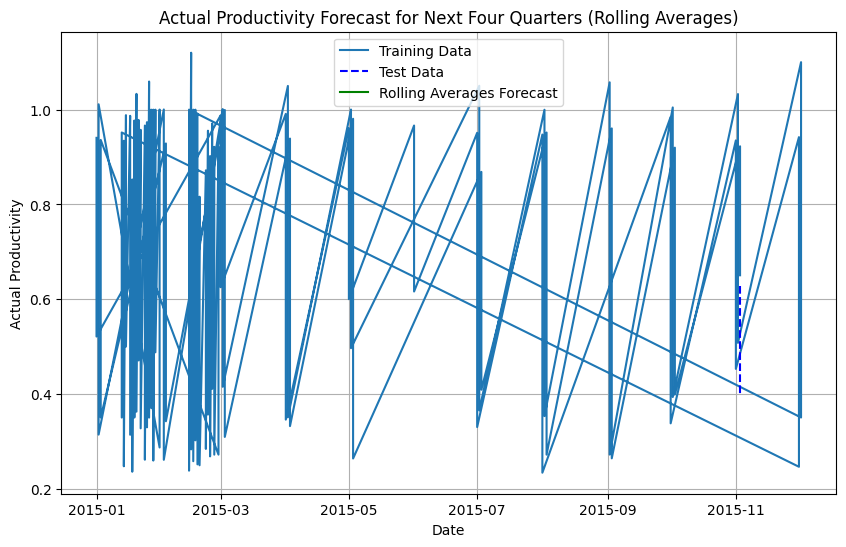

In [ ]:
# Step 4 (continued): Forecast using Rolling Averages
rolling_avg_forecast = train_data.iloc[-1]

# Step 5 (continued): Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue', linestyle='--')
plt.plot(test_data.index, np.full_like(test_data, rolling_avg_forecast), label='Rolling Averages Forecast', color='green')

plt.title('Actual Productivity Forecast for Next Four Quarters (Rolling Averages)')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.grid(True)
plt.show()


## c) Ceate a summary of comparison with the evaluation criteria and their values for each model. You can add more evaluation criteria, which will contribute to your increased chances of selection, but the following are a must have:
## (i) Mean Absolute Percentage Error (MAPE)
## (ii) Mean Squared Error (MSE)

In [ ]:


# Check for NaN values in test data and forecasted values
print("NaN values in test data:", test_data.isnull().sum())
print("NaN values in ARIMA forecast:", arima_forecast.isnull().sum())

# Drop NaN values from both test data and forecasted values
test_data_clean = test_data.dropna()
arima_forecast_clean = arima_forecast[~arima_forecast.isnull()]

# Ensure that both test data and forecasted values contain the same number of samples
min_samples = min(len(test_data_clean), len(arima_forecast_clean))
test_data_clean = test_data_clean[:min_samples]
arima_forecast_clean = arima_forecast_clean[:min_samples]

# Calculate evaluation metrics for ARIMA model with cleaned data
arima_mape = np.mean(np.abs((test_data_clean.values - arima_forecast_clean.values) / test_data_clean.values)) * 100
arima_mse = mean_squared_error(test_data_clean.values, arima_forecast_clean.values)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(test_data_clean.values, arima_forecast_clean.values)
arima_r2 = r2_score(test_data_clean.values, arima_forecast_clean.values)

# Calculate evaluation metrics for Rolling Averages with cleaned data
rolling_avg_mape = np.mean(np.abs((test_data_clean.values - rolling_avg_forecast) / test_data_clean.values)) * 100
rolling_avg_mse = mean_squared_error(test_data_clean.values, np.full_like(test_data_clean.values, rolling_avg_forecast))
rolling_avg_rmse = np.sqrt(rolling_avg_mse)
rolling_avg_mae = mean_absolute_error(test_data_clean.values, np.full_like(test_data_clean.values, rolling_avg_forecast))
rolling_avg_r2 = r2_score(test_data_clean.values, np.full_like(test_data_clean.values, rolling_avg_forecast))

# Create comparison summary
arima_comparison = {'Model': 'ARIMA', 'MAPE': arima_mape, 'MSE': arima_mse, 'RMSE': arima_rmse, 'MAE': arima_mae, 'R-squared': arima_r2}
rolling_avg_comparison = {'Model': 'Rolling Averages', 'MAPE': rolling_avg_mape, 'MSE': rolling_avg_mse, 'RMSE': rolling_avg_rmse, 'MAE': rolling_avg_mae, 'R-squared': rolling_avg_r2}

# Provide a summary of the comparison
print("Summary of Comparison:")
comparison_df = pd.DataFrame([arima_comparison, rolling_avg_comparison])
print(comparison_df)


NaN values in test data: 0
NaN values in ARIMA forecast: 0
Summary of Comparison:
              Model       MAPE       MSE      RMSE       MAE  R-squared
0             ARIMA  30.132735  0.028829  0.169791  0.136590  -2.083638
1  Rolling Averages  25.240790  0.021883  0.147928  0.111954  -1.340640


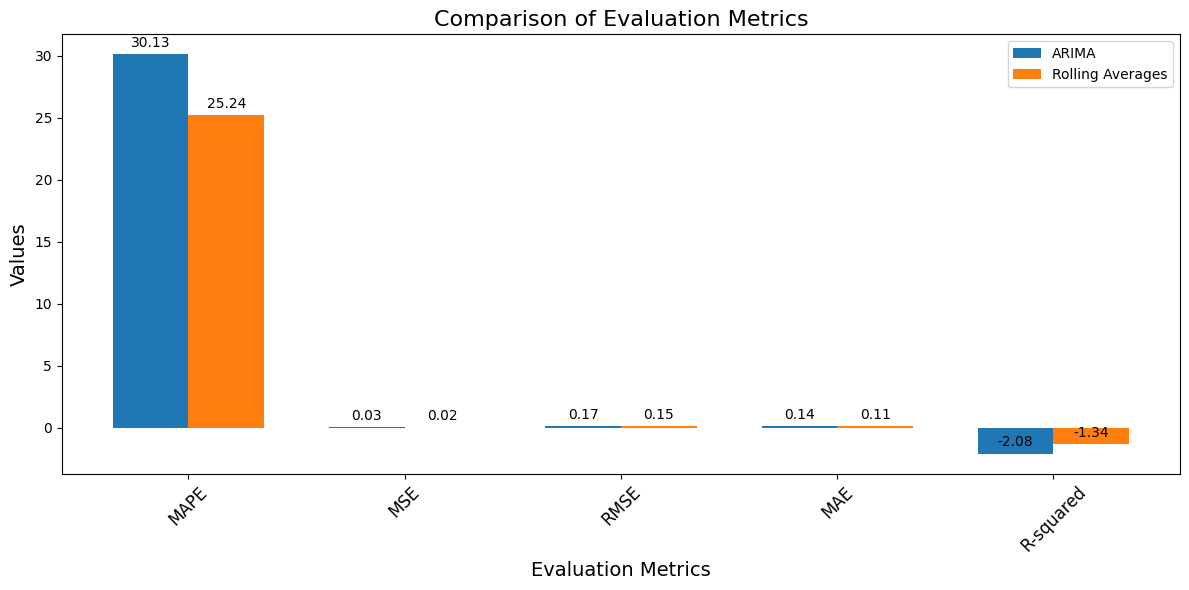

In [ ]:
# Create comparison summary
arima_comparison = {'Model': 'ARIMA', 'MAPE': arima_mape, 'MSE': arima_mse, 'RMSE': arima_rmse, 'MAE': arima_mae, 'R-squared': arima_r2}
rolling_avg_comparison = {'Model': 'Rolling Averages', 'MAPE': rolling_avg_mape, 'MSE': rolling_avg_mse, 'RMSE': rolling_avg_rmse, 'MAE': rolling_avg_mae, 'R-squared': rolling_avg_r2}

comparison_df = pd.DataFrame([arima_comparison, rolling_avg_comparison])

# Visualize the comparison
metrics = ['MAPE', 'MSE', 'RMSE', 'MAE', 'R-squared']
num_metrics = len(metrics)
bar_width = 0.35
index = np.arange(num_metrics)

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(index, comparison_df.iloc[0, 1:], bar_width, label='ARIMA')
rects2 = ax.bar(index + bar_width, comparison_df.iloc[1, 1:], bar_width, label='Rolling Averages')

ax.set_xlabel('Evaluation Metrics', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Comparison of Evaluation Metrics', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics, fontsize=12, rotation=45)
ax.legend()

# Add value labels on top of each bar
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Section 2 - A/B Testing

In [ ]:
# Import data from the ABTest sheet of the AssignmentData.xlsx file into a dataframe named abtest

import pandas as pd
# Load the dataset from Google Drive
abtest = pd.read_excel('/content/drive/MyDrive/datasets/AssignmentData.xlsx', sheet_name='ABTest')


In [ ]:
abtest.head()

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control


In [ ]:
#check missing value and duplicate values

# Check for missing values
print("Missing Values:\n", abtest.isnull().sum())

# Check for duplicate values
print("Duplicate Values:", abtest.duplicated().sum())


Missing Values:
 Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64
Duplicate Values: 0


In [ ]:
# remove missing values and print

abtest.dropna(inplace=True)
print("Missing Values After Removal:", abtest.isnull().sum())


Missing Values After Removal: Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64


In [ ]:
#describe

abtest.describe()


,Date,Clicks,Visitors
count,18099,18099.000000,18099.000000
mean,2023-05-15 09:33:19.602188032,62.600033,495.485441
min,2023-05-07 00:00:00,0.000000,0.000000
25%,2023-05-11 00:00:00,6.000000,21.000000
50%,2023-05-15 00:00:00,11.000000,33.000000
75%,2023-05-20 00:00:00,20.000000,97.000000
max,2023-05-24 00:00:00,11199.000000,211868.000000
std,NaN,377.536611,5704.920360


In [ ]:
#dtypes

print(abtest.dtypes)


Date        datetime64[ns]
Device              object
Address             object
Clicks               int64
Visitors             int64
Group               object
dtype: object


## Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for each device type creating separate trendlines for each device in order to find which device performed best in terms of total number of clicks.

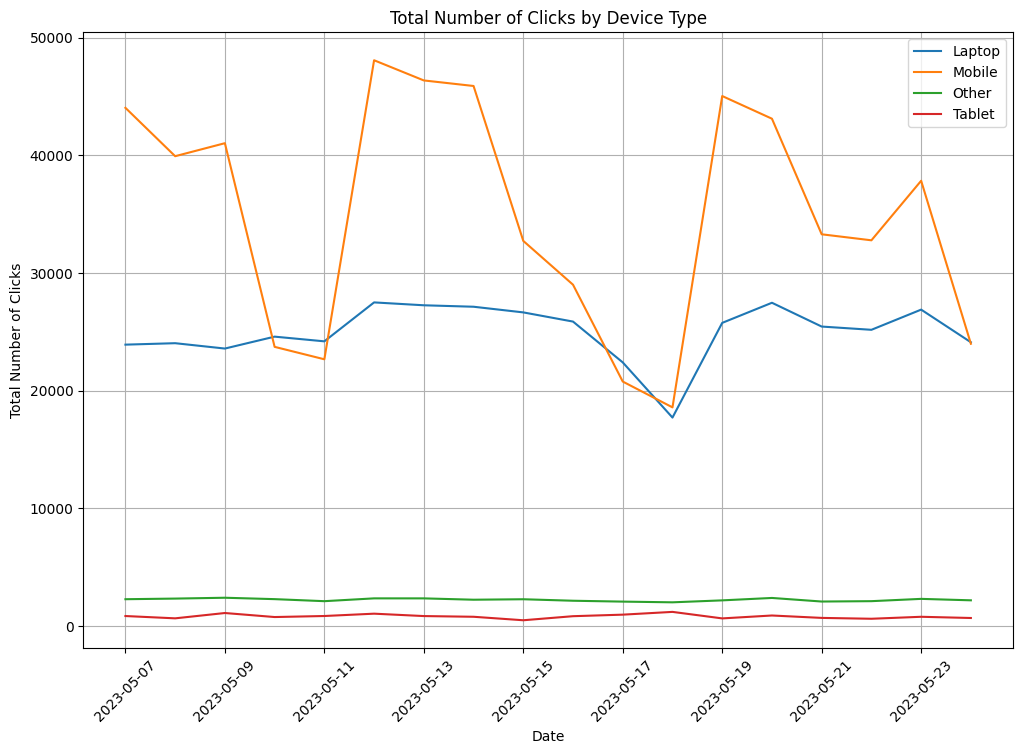

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
abtest = pd.read_excel('/content/drive/MyDrive/datasets/AssignmentData.xlsx', sheet_name='ABTest')

# Convert Date column to datetime type
abtest['Date'] = pd.to_datetime(abtest['Date'])

# Group the data by Date and Device and calculate total clicks
clicks_by_device = abtest.groupby(['Date', 'Device'])['Clicks'].sum().unstack()

# Plot the time series visualization with separate trendlines for each device
plt.figure(figsize=(12, 8))
for column in clicks_by_device.columns:
    plt.plot(clicks_by_device.index, clicks_by_device[column], label=column)

plt.title('Total Number of Clicks by Device Type')
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%,. What is the sample size required for the test? (Use this article to supplement your understanding - Sample Size in A/B Testing). Do we have sufficient sample size to conclude the test?

Given:

MDE (minimum detectable effect) = 3%
α (significance level) = 0.05 (95% confidence level)
Statistical power (1-β) = 0.80 (80% power)
We also need to know the baseline conversion rate, which is the conversion rate we expect to observe under the current conditions (before implementing any changes).

Let's assume a baseline conversion rate of 10% for this example.

Using these values, we can calculate the required sample size. However, since the calculation involves complex statistical formulas, it's common to use online sample size calculators or statistical software.

In [ ]:
from statsmodels.stats.power import NormalIndPower

# Given values
baseline_conversion_rate = 0.10  # 10%
MDE = 0.03  # 3%
alpha = 0.05  # Significance level (α)
power = 0.80  # Statistical power (1-β)

# Standard deviation under the null hypothesis (assuming binomial distribution)
sigma = (2 * baseline_conversion_rate * (1 - baseline_conversion_rate)) ** 0.5

# Initialize the NormalIndPower object
power_analysis = NormalIndPower()

# Calculate the sample size
sample_size = power_analysis.solve_power(effect_size=MDE / sigma, alpha=alpha, power=power, alternative='larger')

print("Required sample size:", round(sample_size))


Required sample size: 2473


In [ ]:
from scipy.stats import norm

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    # Calculate conversion rates for control and treatment groups
    control_rate = control_conversions / control_visitors
    treatment_rate = treatment_conversions / treatment_visitors

    # Calculate standard error for control and treatment groups
    control_se = (control_rate * (1 - control_rate) / control_visitors) ** 0.5
    treatment_se = (treatment_rate * (1 - treatment_rate) / treatment_visitors) ** 0.5

    # Calculate z-score for the given confidence level
    if confidence_level == 90:
        z_critical = norm.ppf(0.95)
    elif confidence_level == 95:
        z_critical = norm.ppf(0.975)
    elif confidence_level == 99:
        z_critical = norm.ppf(0.995)
    else:
        raise ValueError("Confidence level must be one of: 90, 95, 99")

    # Calculate margin of error
    margin_of_error = z_critical * ((control_se ** 2) + (treatment_se ** 2)) ** 0.5

    # Calculate confidence interval
    confidence_interval = (treatment_rate - control_rate) - margin_of_error, (treatment_rate - control_rate) + margin_of_error

    # Perform hypothesis testing
    if confidence_interval[0] > 0:
        return "Experiment Group is Better"
    elif confidence_interval[1] < 0:
        return "Control Group is Better"
    else:
        return "Indeterminate"

# Test the function using example data
control_visitors = 1000
control_conversions = 100
treatment_visitors = 1100
treatment_conversions = 120
confidence_level = 95

result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("AB Test Result:", result)


AB Test Result: Indeterminate


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from scipy.stats import norm

# A/B test function
def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    control_rate = control_conversions / control_visitors
    treatment_rate = treatment_conversions / treatment_visitors

    control_se = (control_rate * (1 - control_rate) / control_visitors) ** 0.5
    treatment_se = (treatment_rate * (1 - treatment_rate) / treatment_visitors) ** 0.5

    if confidence_level == 90:
        z_critical = norm.ppf(0.95)
    elif confidence_level == 95:
        z_critical = norm.ppf(0.975)
    elif confidence_level == 99:
        z_critical = norm.ppf(0.995)
    else:
        raise ValueError("Confidence level must be one of: 90, 95, 99")

    margin_of_error = z_critical * ((control_se ** 2) + (treatment_se ** 2)) ** 0.5

    confidence_interval = (treatment_rate - control_rate) - margin_of_error, (treatment_rate - control_rate) + margin_of_error

    if confidence_interval[0] > 0:
        return "Experiment Group is Better"
    elif confidence_interval[1] < 0:
        return "Control Group is Better"
    else:
        return "Indeterminate"

# Streamlit app
def main():
    st.title("A/B Test Hypothesis Testing App")

    st.sidebar.header("Input Parameters")
    control_visitors = st.sidebar.number_input("Control Group Visitors", min_value=1)
    control_conversions = st.sidebar.number_input("Control Group Conversions", min_value=0)
    treatment_visitors = st.sidebar.number_input("Treatment Group Visitors", min_value=1)
    treatment_conversions = st.sidebar.number_input("Treatment Group Conversions", min_value=0)
    confidence_level = st.sidebar.selectbox("Confidence Level", [90, 95, 99])

    if st.sidebar.button("Perform A/B Test"):
        result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
        st.write("A/B Test Result:", result)

if __name__ == "__main__":
    main()


2024-04-04 23:03:14.881 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run my_streamlit_app.py &>/dev/null &


---
# Section 3 - Advanced Learning


You can pick one of the following topics to learn more about using the provided resources. The topic you choose will be discussed in depth during the interview process.

  - Multi-Armed Bandit (MAB)<br>
[A brief overview of the Multi-Armed Bandit in Reinforcement Learning](https://medium.com/analytics-vidhya/a-brief-overview-of-the-multi-armed-bandit-in-reinforcement-learning-d086853dc90a)<br>
[Solving the Multi-Armed Bandit Problem](https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c)<br>
[What is the Multi-Armed Bandit Problem?](https://www.optimizely.com/optimization-glossary/multi-armed-bandit/)<br><br>
  - Controlled experiment using Pre-Experiment Data (CUPED)<br>
[Understanding CUPED](https://matteocourthoud.github.io/post/cuped/) <br>
[Understanding how CUPED in GrowthBook Reduces Experiment Runtimes at the Los Angeles Times](https://medium.com/growth-book/understanding-how-cuped-in-growthbook-reduces-experiment-runtimes-at-the-los-angeles-times-79ba7c288d71)<br>
[How Booking.com increases the power of online experiments with CUPED](https://booking.ai/how-booking-com-increases-the-power-of-online-experiments-with-cuped-995d186fff1d)
<br><br>
  - Causal Inference<br>
[Causal Inference as a Blind Spot of Data Scientists](https://dzidas.com/ml/2023/10/15/blind-spot-ds/)<br>
[Causal inference (Part 1 of 3): Understanding the fundamentals](https://medium.com/data-science-at-microsoft/causal-inference-part-1-of-3-understanding-the-fundamentals-816f4723e54a)